## Maven Telecommunication Customers Churn Prediction.

<img src="./telecom_customers.png"/>

# Business Overview

### What Is Customers Churn

Customer churn refers to the phenomenon where customers cease their relationship with a company or discontinue using its products or services. Predicting customer churn is crucial as it allows companies to identify customers who are likely to leave and take proactive measures to retain them. This is important because losing customers results in revenue loss, reduced market share, and increased costs of acquiring new customers. Additionally, customer churn can negatively impact a company's reputation and disrupt its growth plans. By predicting and addressing churn, businesses can improve customer retention, enhance profitability, and maintain a competitive edge in the market.

### Problem Statement

Maven Communications, a telecommunications company, wants to create a model  that can predict if customers will stop using their services soon. This is important because Maven Communications wants to reduce the amount of money they lose when customers leave. They want to know if there are any patterns that can help them predict when customers might leave and it will help them identify customers who are likely to stop using their services. This information will help Maven Communications take action to keep those customers from leaving. 


# Business objective

As a BI Consultant, my role is to assist Maven Communications in predicting customer's  churn and reducing revenue loss by analyzing customer data and identifying patterns, I will develop a classification model to predict if a customer will churn or not. This model will leverage customer details, service usage, and other relevant information. The insights derived from the analysis will drive strategies to enhance customer experience, optimize resource allocation and increase customer loyalty. 

### Specific Objective

* To build a classification model which can predict if a customer will churn or not.
* To find out how to optimize customers retention and increase Customer Satisfaction
* To understand customers pain point (Issues that customer experience that make them churn)
* To Analyse the data in terms of various features responsible for customer Churn

The metrics we will use to measure the success of this model are as follows:
*  Achieving an accuracy score of over 85 percent.
*  Achieving a recall rate of over 60 percent. It is more favorable to correctly identify a customer as churned even if they haven't, rather than incorrectly predicting that they haven't churned when they actually have. The latter scenario can lead to significant losses and is considered worse.

# Data understanding

In [57]:
#import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, mean_squared_error, roc_curve, auc, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
import xgboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import plotly.express as px
from sklearn.model_selection import GridSearchCV






In [2]:
#importing data
dataset =pd.read_csv('data_folder/telecom_customer_churn.csv')
#create a new DataFrame to work with
df = dataset.copy()
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
"""Function to describe data"""

def data_info(data):
   
    inf = data.info()
    print('--------------------------------------------------------')
    
    col = data.columns
    print('--------------------------------------------------------')
    shape_ = data.shape

    
    return   inf, col, shape_, 

data_info(df) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

(None,
 Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
        'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
        'Tenure in Months', 'Offer', 'Phone Service',
        'Avg Monthly Long Distance Charges', 'Multiple Lines',
        'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
        'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges',
        'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
       dtype='object'),
 (7043, 38))

In [4]:
#obtaining summary statistics of the data
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


* This data has 38 columns and 7043 rows.
* Each row represents a unique customer   and each column gives metadata about the customer. 
* This data pertains to the customers that the companies have  had during the second quarter of 2022 Q2, collected over a three-month period from April 1st to June 30th.

 Our target column consists of three classes: 'churned', 'stayed', and 'joined'. Since we are predicting using customer features collected for a period of 3 months in Q2, the 'joined' class is not a true representation because the 'joined' class represents customers who have recently joined and their class features have not been monitored for the April to May quarter and also  during the Q3, these customers will either be in the 'churned' or 'stayed' class.  Hence this will be a **Binary Classification for predicting if a customer will churn or not.**


In [3]:
#dropping the joined class
df = df[df['Customer Status'] != 'Joined']



# Data cleaning

Before we  build our classification model or visualize our data we need to fix our data, remove all errors, all data inconsistencies  and put data in the correct format.



The Steps involved are:
* Detecting and dealing with missing values.
* Dealing with duplicates
* Conversion of columns to their correct data types and checking for inconsistencies
* Dealing with outliers.




## 1. Missing Values

In [6]:
"""Checking missing values"""
def missing_values(data):
    #identify missing values per columns
    miss = data.isna().sum()
    #calculate percentage of missing values per columns
    percentage = (data.isna().sum()/len(data)).round(4)
    #create a dataframe
    return pd.DataFrame({'Missing values':miss, 'Percentage':percentage})
missing_values(df)

,Missing values,Percentage
Customer ID,0,0.0000
Gender,0,0.0000
Age,0,0.0000
Married,0,0.0000
Number of Dependents,0,0.0000
City,0,0.0000
Zip Code,0,0.0000
Latitude,0,0.0000
Longitude,0,0.0000
Number of Referrals,0,0.0000


 * 71.63  percent  of data in churn category and churn reason column are missing   and filling them will bring skewness in our data distribution.
 * 20.40 percent of data in this  other 10 columns  [internet service, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV,Unlimited Data ] from the above table are missing .Most of this columns are categorical and we will fill  them using forward fill.
  * 9.77 percent of data in Avg Monthly Long Distance Charges	and multiple lines columns are missing.
  * Id column is not relevant in our prediction model hence being dropped.

We will drop the two columns with most of their values missing and forward fill the other columns for randomness.


In [4]:
#dropping churn category and churn reason columns
df.drop(['Churn Category', 'Churn Reason'], axis =1, inplace = True)
#filling othe columns  missing values
df.fillna(method = 'ffill', inplace = True)
#dropping ID column since it's not relevant for our analysis
df.drop('Customer ID', axis = 1, inplace = True)



## 2. Duplicates

In [8]:
"""Function to check  and drop  duplicates"""
def check_and_drop_duplicates(data):
    # Check duplicates
    duplicates_counts = data.duplicated().value_counts()

    # Drop duplicates
    data.drop_duplicates(inplace=True)

    return duplicates_counts

duplicates_counts = check_and_drop_duplicates(df)
print(duplicates_counts)


False    6589
dtype: int64


This data has no duplicates.

##  3.Checking for inconsistencies

In [10]:
"""Function to check for value counts per column"""
def value_count(data):
    for col in data.columns:
        # print column name
        print('Value counts for {} column:'.format(col))
        # print values counts for the column
        print(df[col].value_counts())
        # add separator for clarity
        print( '='*30)
        
    


value_count(df)

Value counts for Gender column:
Male      3312
Female    3277
Name: Gender, dtype: int64
Value counts for Age column:
47    144
42    141
23    138
40    138
56    137
     ... 
71     64
78     63
66     62
67     61
72     56
Name: Age, Length: 62, dtype: int64
Value counts for Married column:
Yes    3318
No     3271
Name: Married, dtype: int64
Value counts for Number of Dependents column:
0    5042
1     526
2     506
3     491
5       9
4       8
6       3
7       2
9       1
8       1
Name: Number of Dependents, dtype: int64
Value counts for City column:
San Diego        278
Los Angeles      275
San Jose         110
Sacramento       102
San Francisco     97
                ... 
Scotia             2
Hat Creek          2
Lebec              2
Highland           1
Jacumba            1
Name: City, Length: 1106, dtype: int64
Value counts for Zip Code column:
92028    41
92027    35
92122    34
92117    34
92126    32
         ..
93243     2
92346     1
91934     1
93534     1
93711     

* All columns are of the correct datatype
* Data has  no inconsistencies, placeholders or  wrong entries.

## 4. Outliers

In [11]:
"""Function to check for outliers"""
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))
    axes = axes.flatten()  # Convert axes array to 1D

    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.tight_layout()
    plt.show()



IQR for Age column: 27.0
Number of outliers in Age column: 0
IQR for Number of Dependents column: 0.0
Number of outliers in Number of Dependents column: 1547
IQR for Number of Referrals column: 3.0
Number of outliers in Number of Referrals column: 649
IQR for Tenure in Months column: 45.0
Number of outliers in Tenure in Months column: 0
IQR for Avg Monthly Long Distance Charges column: 24.609999999999996
Number of outliers in Avg Monthly Long Distance Charges column: 0
IQR for Monthly Charge column: 54.60000000000001
Number of outliers in Monthly Charge column: 0
IQR for Total Charges column: 3458.45
Number of outliers in Total Charges column: 0
IQR for Total Refunds column: 0.0
Number of outliers in Total Refunds column: 520
IQR for Total Extra Data Charges column: 0.0
Number of outliers in Total Extra Data Charges column: 684
IQR for Total Long Distance Charges column: 1168.4399999999998
Number of outliers in Total Long Distance Charges column: 136
IQR for Total Revenue column: 4271.

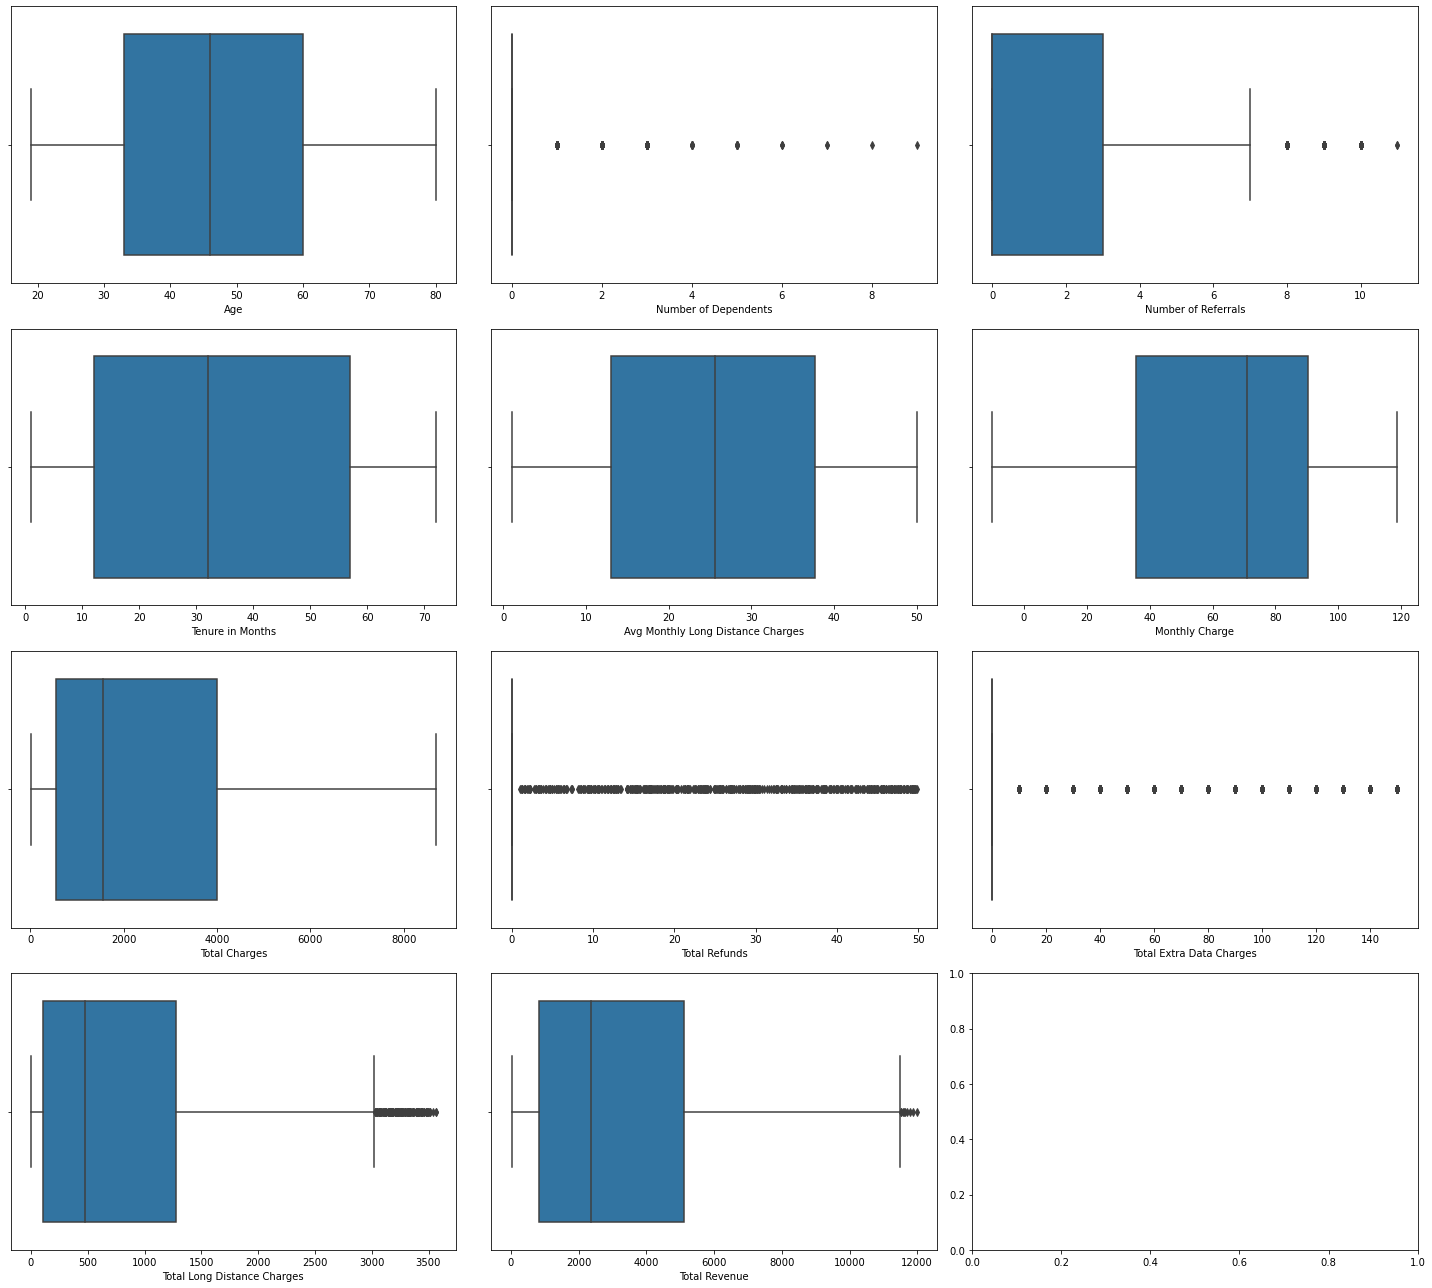

In [13]:
columns_to_check_outliers = ['Age', 'Number of Dependents',
        'Number of Referrals', 'Tenure in Months',
        'Avg Monthly Long Distance Charges',
        'Monthly Charge','Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue']
check_outliers(df, columns_to_check_outliers)

From the boxplot:
* The "Number of Dependents" column does have outliers, but it is important to note that the majority of values are 0. This results in a skewed distribution, as many telecom customers have no dependents.

*  More than half (51.6%)  of customers  gave no referrals, so the  outliers are not reallly present it just that data is  skewed toward zero,  which affects the interquartile range (IQR). The same notion applies to the "Total Refunds" and "Total Extra Data Charges" columns.

* The "Total Revenue" column shows varying levels of revenue. We will retain this information to examine its relationship with the predictor column.

# Explanatory Data Analysis

### Univariate Analysis

First we will subdivide the columns into numerical and categorical columns.

In [5]:
#choosing numerical columns
num_columns = df.select_dtypes(include = 'number')
#choosing categorical columns
cat_columns = df.select_dtypes(exclude = 'number')


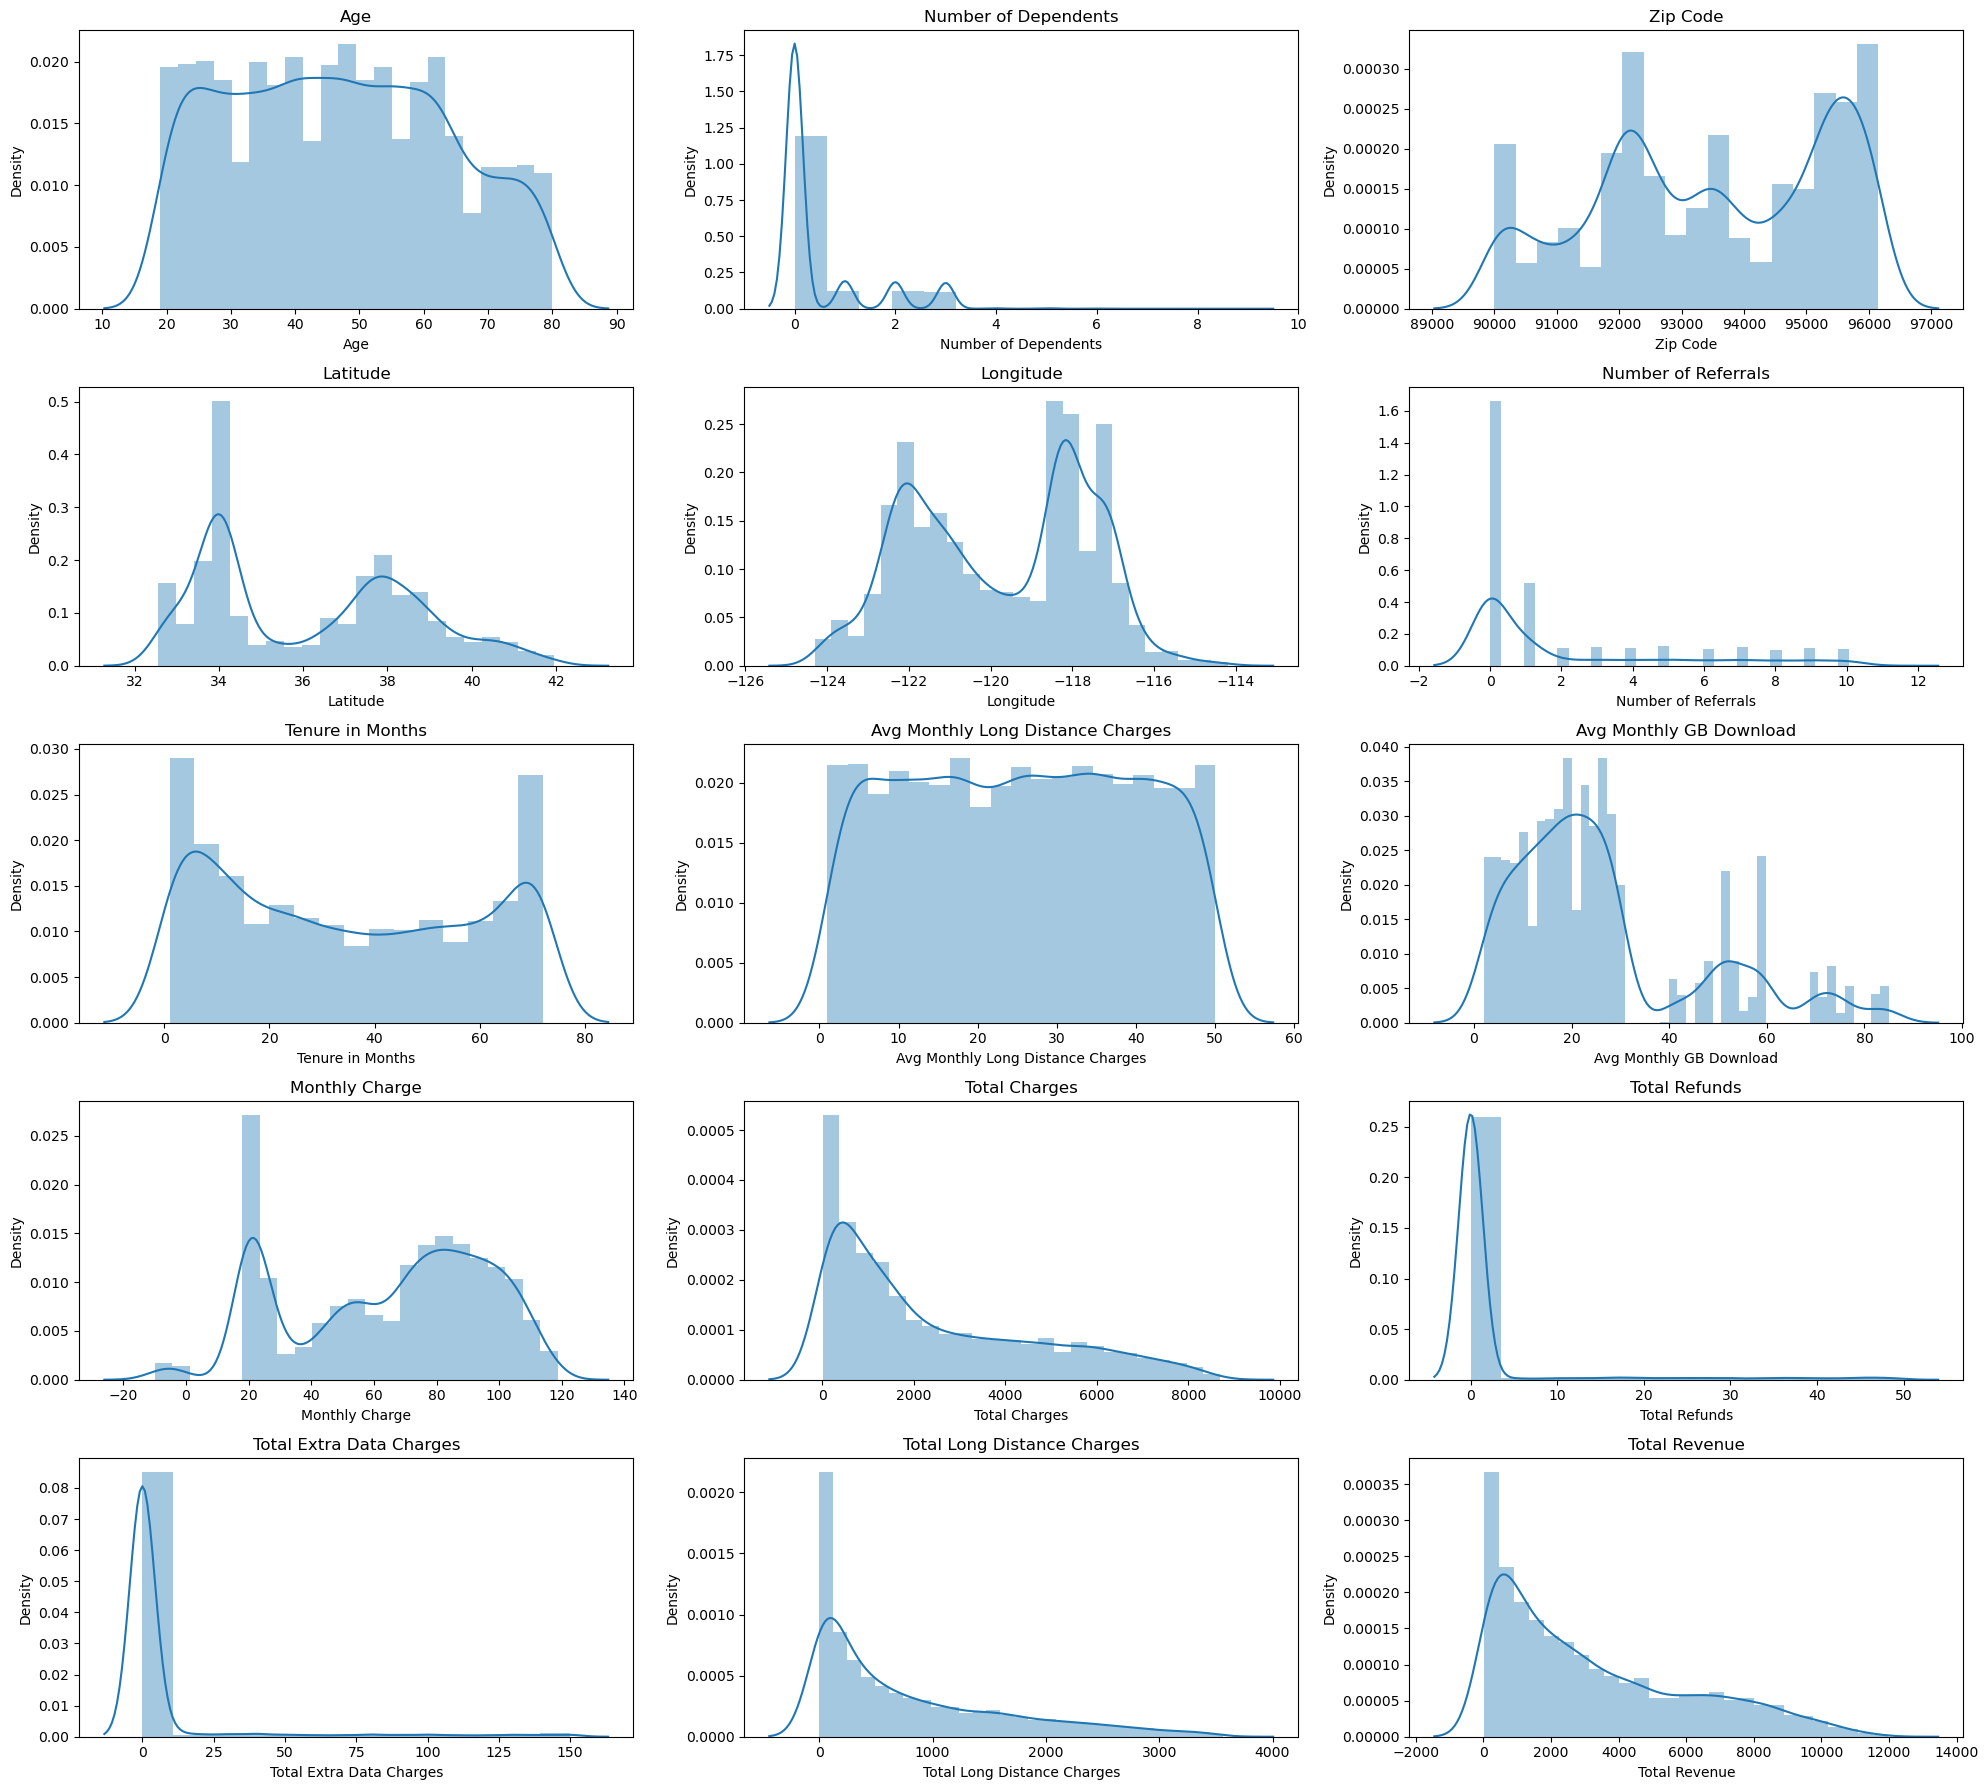

In [7]:
"""Visualizing numerical  columns"""
#create a figure and set subplots
fig, axes = plt.subplots(5,3, figsize = (20,18))
#iterate all the axes
ax = axes.flatten()

for i, col in enumerate(num_columns.columns):
    #plot an histogram for each column
    sns.distplot(num_columns[col], ax = ax[i], bins = 'auto')
    ax[i].set_title(col)
    
#adjust  padding
fig.tight_layout()
#display the plot
plt.show()




* Most of the features are skewed to the right ~ positive skewness  they include total revenue, total long distance charges, monthly charges, total charges, number of referrals, number of dependants, total refunds,  average monthly GB downloads and average monthly downloads.
* The avrg monthly long distance charges and Age  column has a uniform distribution.
* monthly charge  column is left skewed.
* longitude, latitude have random distributions.
* Zipcode is left skewed.


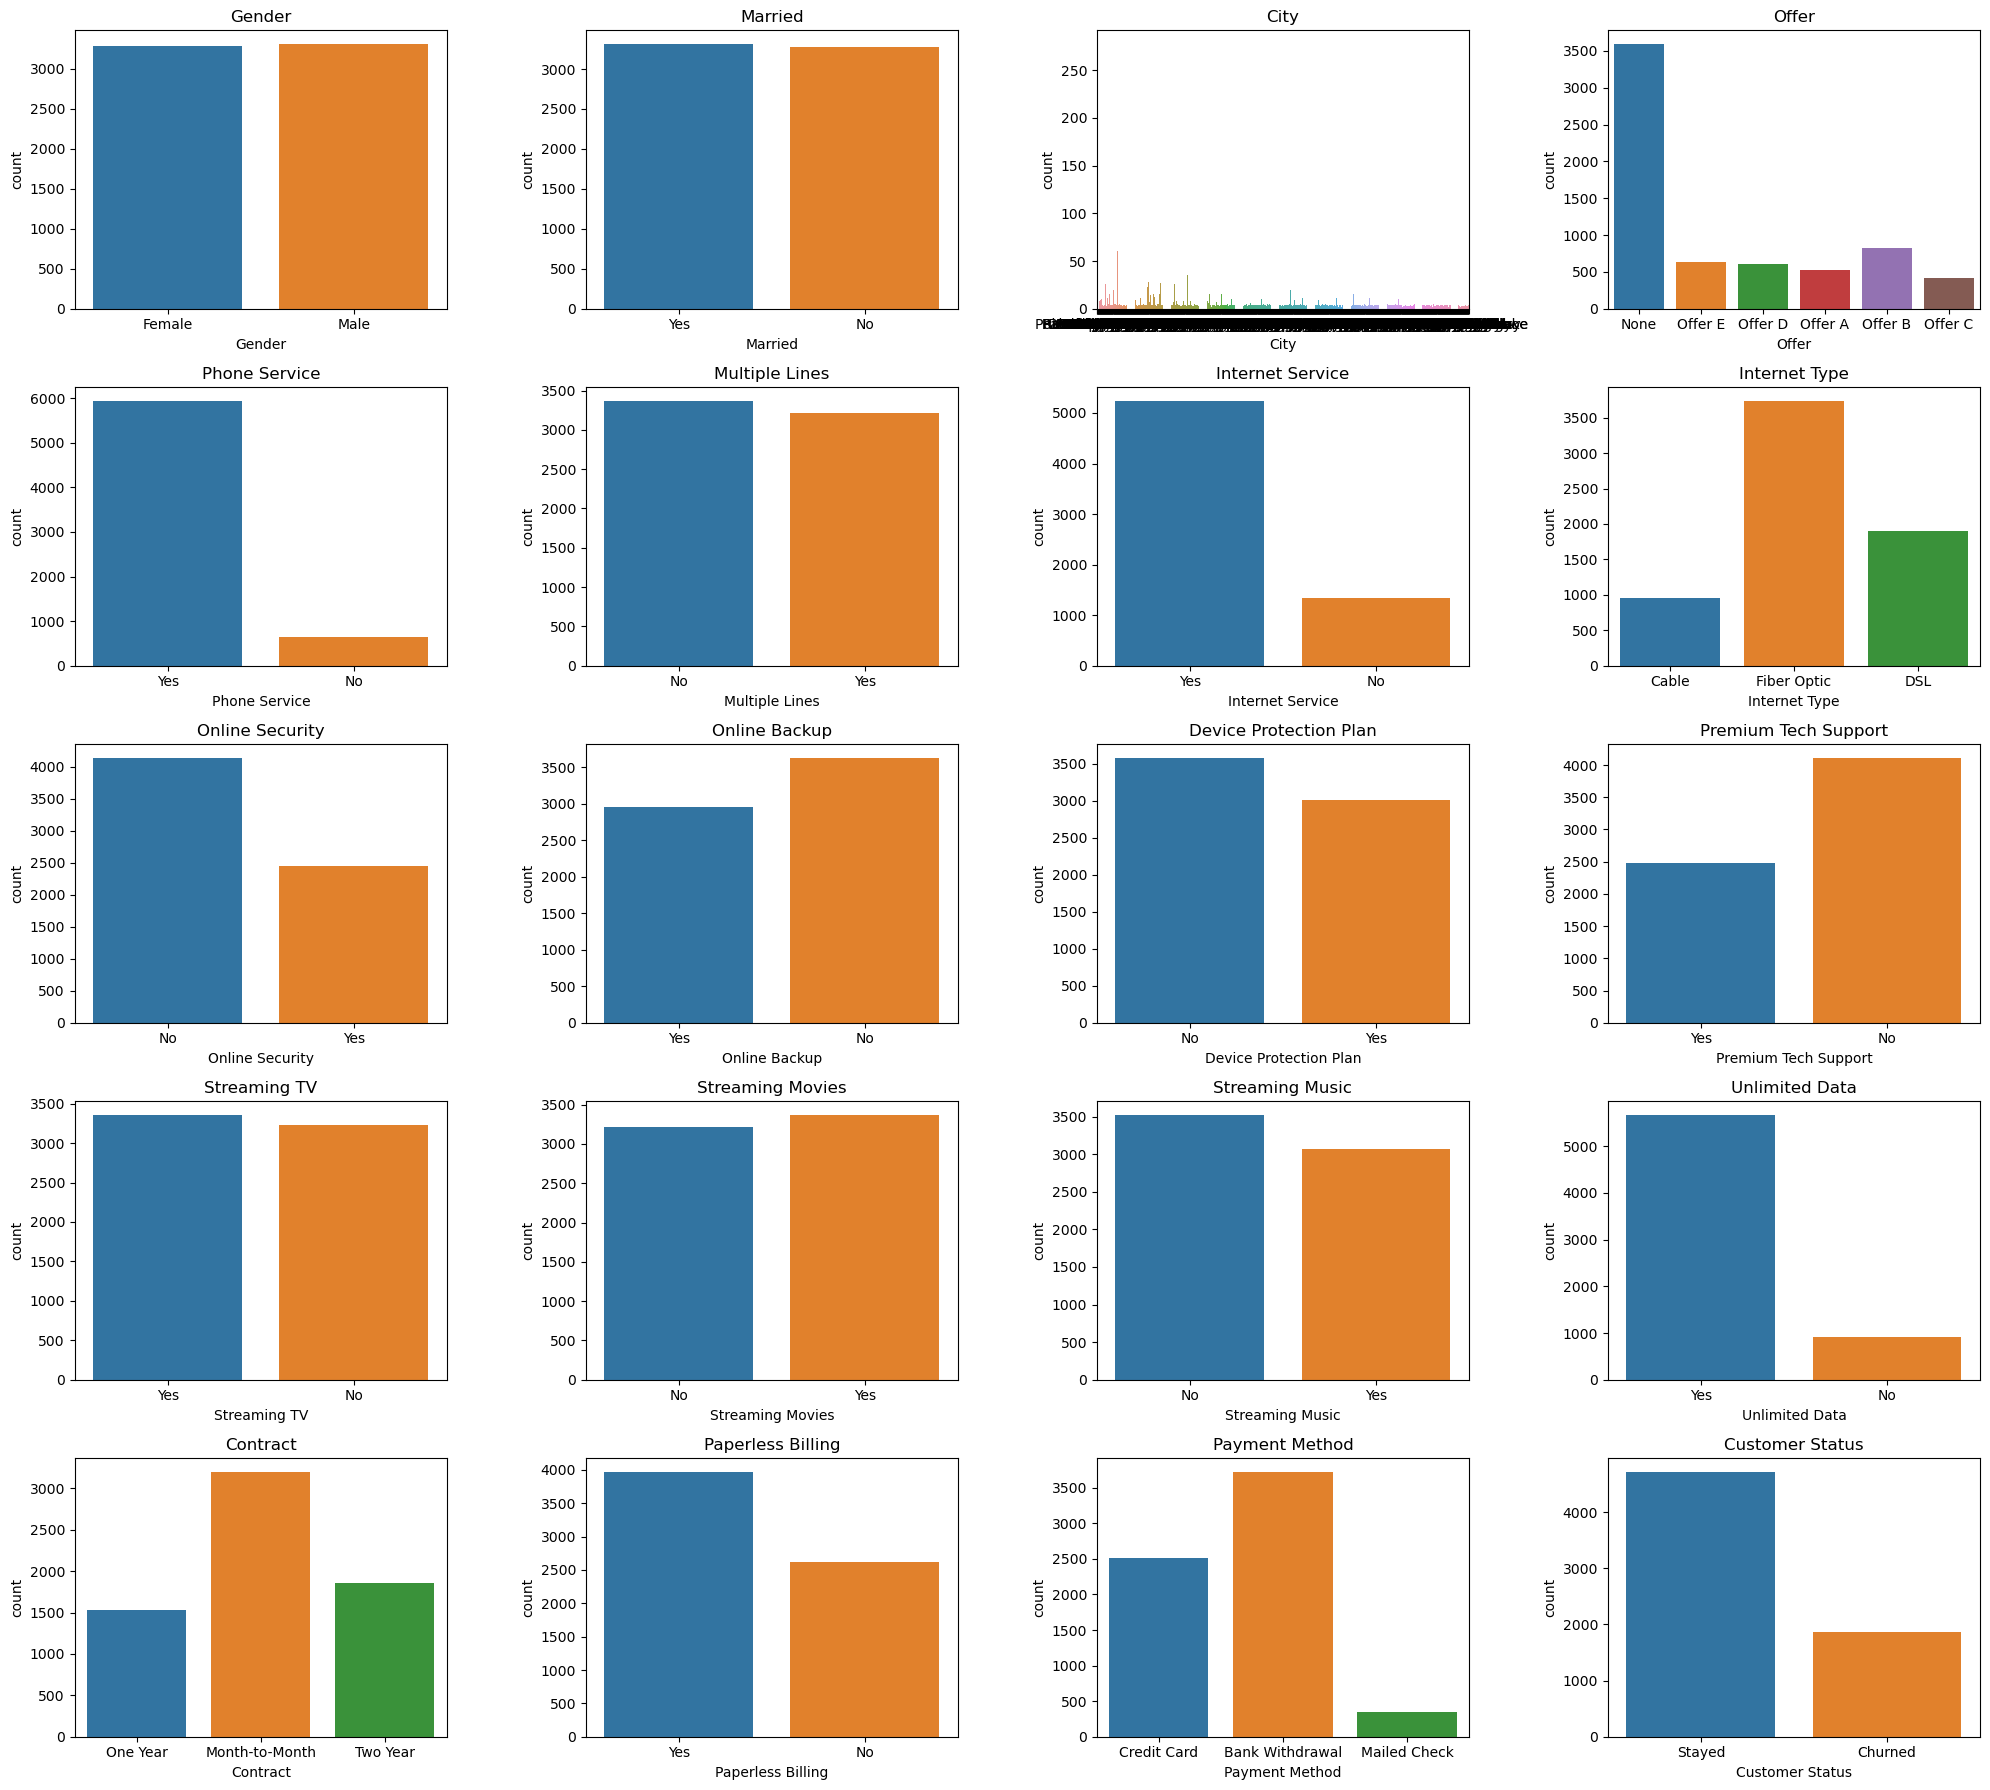

In [14]:
"""Visualizing Categorical  columns"""
#create a figure and set subplots
fig, axes = plt.subplots(5,4, figsize = (20,18))
#iterate all the axes
ax = axes.flatten()

for i, col in enumerate(cat_columns.columns):
    #plot an histogram for each column
    sns.countplot(x =cat_columns[col], ax = ax[i])
    ax[i].set_title(col)
    
#adjust  padding
fig.tight_layout()
#display the plot
plt.show()

* Customers gender and the number of married and unmarried customers equally are distributed.  
Majority of the customers :
* Have phone  and internet services and also use fibre optics cables for internet connection and have unlimited  data.
* Have Paperless billing and use bank withdrawal payment method.
*  Do not recieve any offer or have multiple lines, they also don't have online backup, online security, device protection plan or premium tech support.
* Have streaming tv but most stream movies and not music.
* Prefer monthly contract compared to annual or bi annual contracts. 
* The number of customers who did not churn is higher than customers who churned.

# Bivariate Analysis

This section will involve checking how our predictor column, customer status,  relates to our features.


In [8]:
df.groupby('Customer Status').mean()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer Status,,,,,,,,,,,,,,,
Churned,49.735688,0.118245,93435.752809,36.026801,-119.670474,0.521134,17.979133,25.502739,23.857678,73.347592,1531.796094,1.518983,7.158909,433.917549,1971.353569
Stayed,45.582415,0.617797,93513.580720,36.268249,-119.792197,2.614831,41.041525,25.410131,27.275212,61.737415,2788.516831,2.303458,7.173729,942.289195,3735.676297


### Categorical Columns and our target variable.

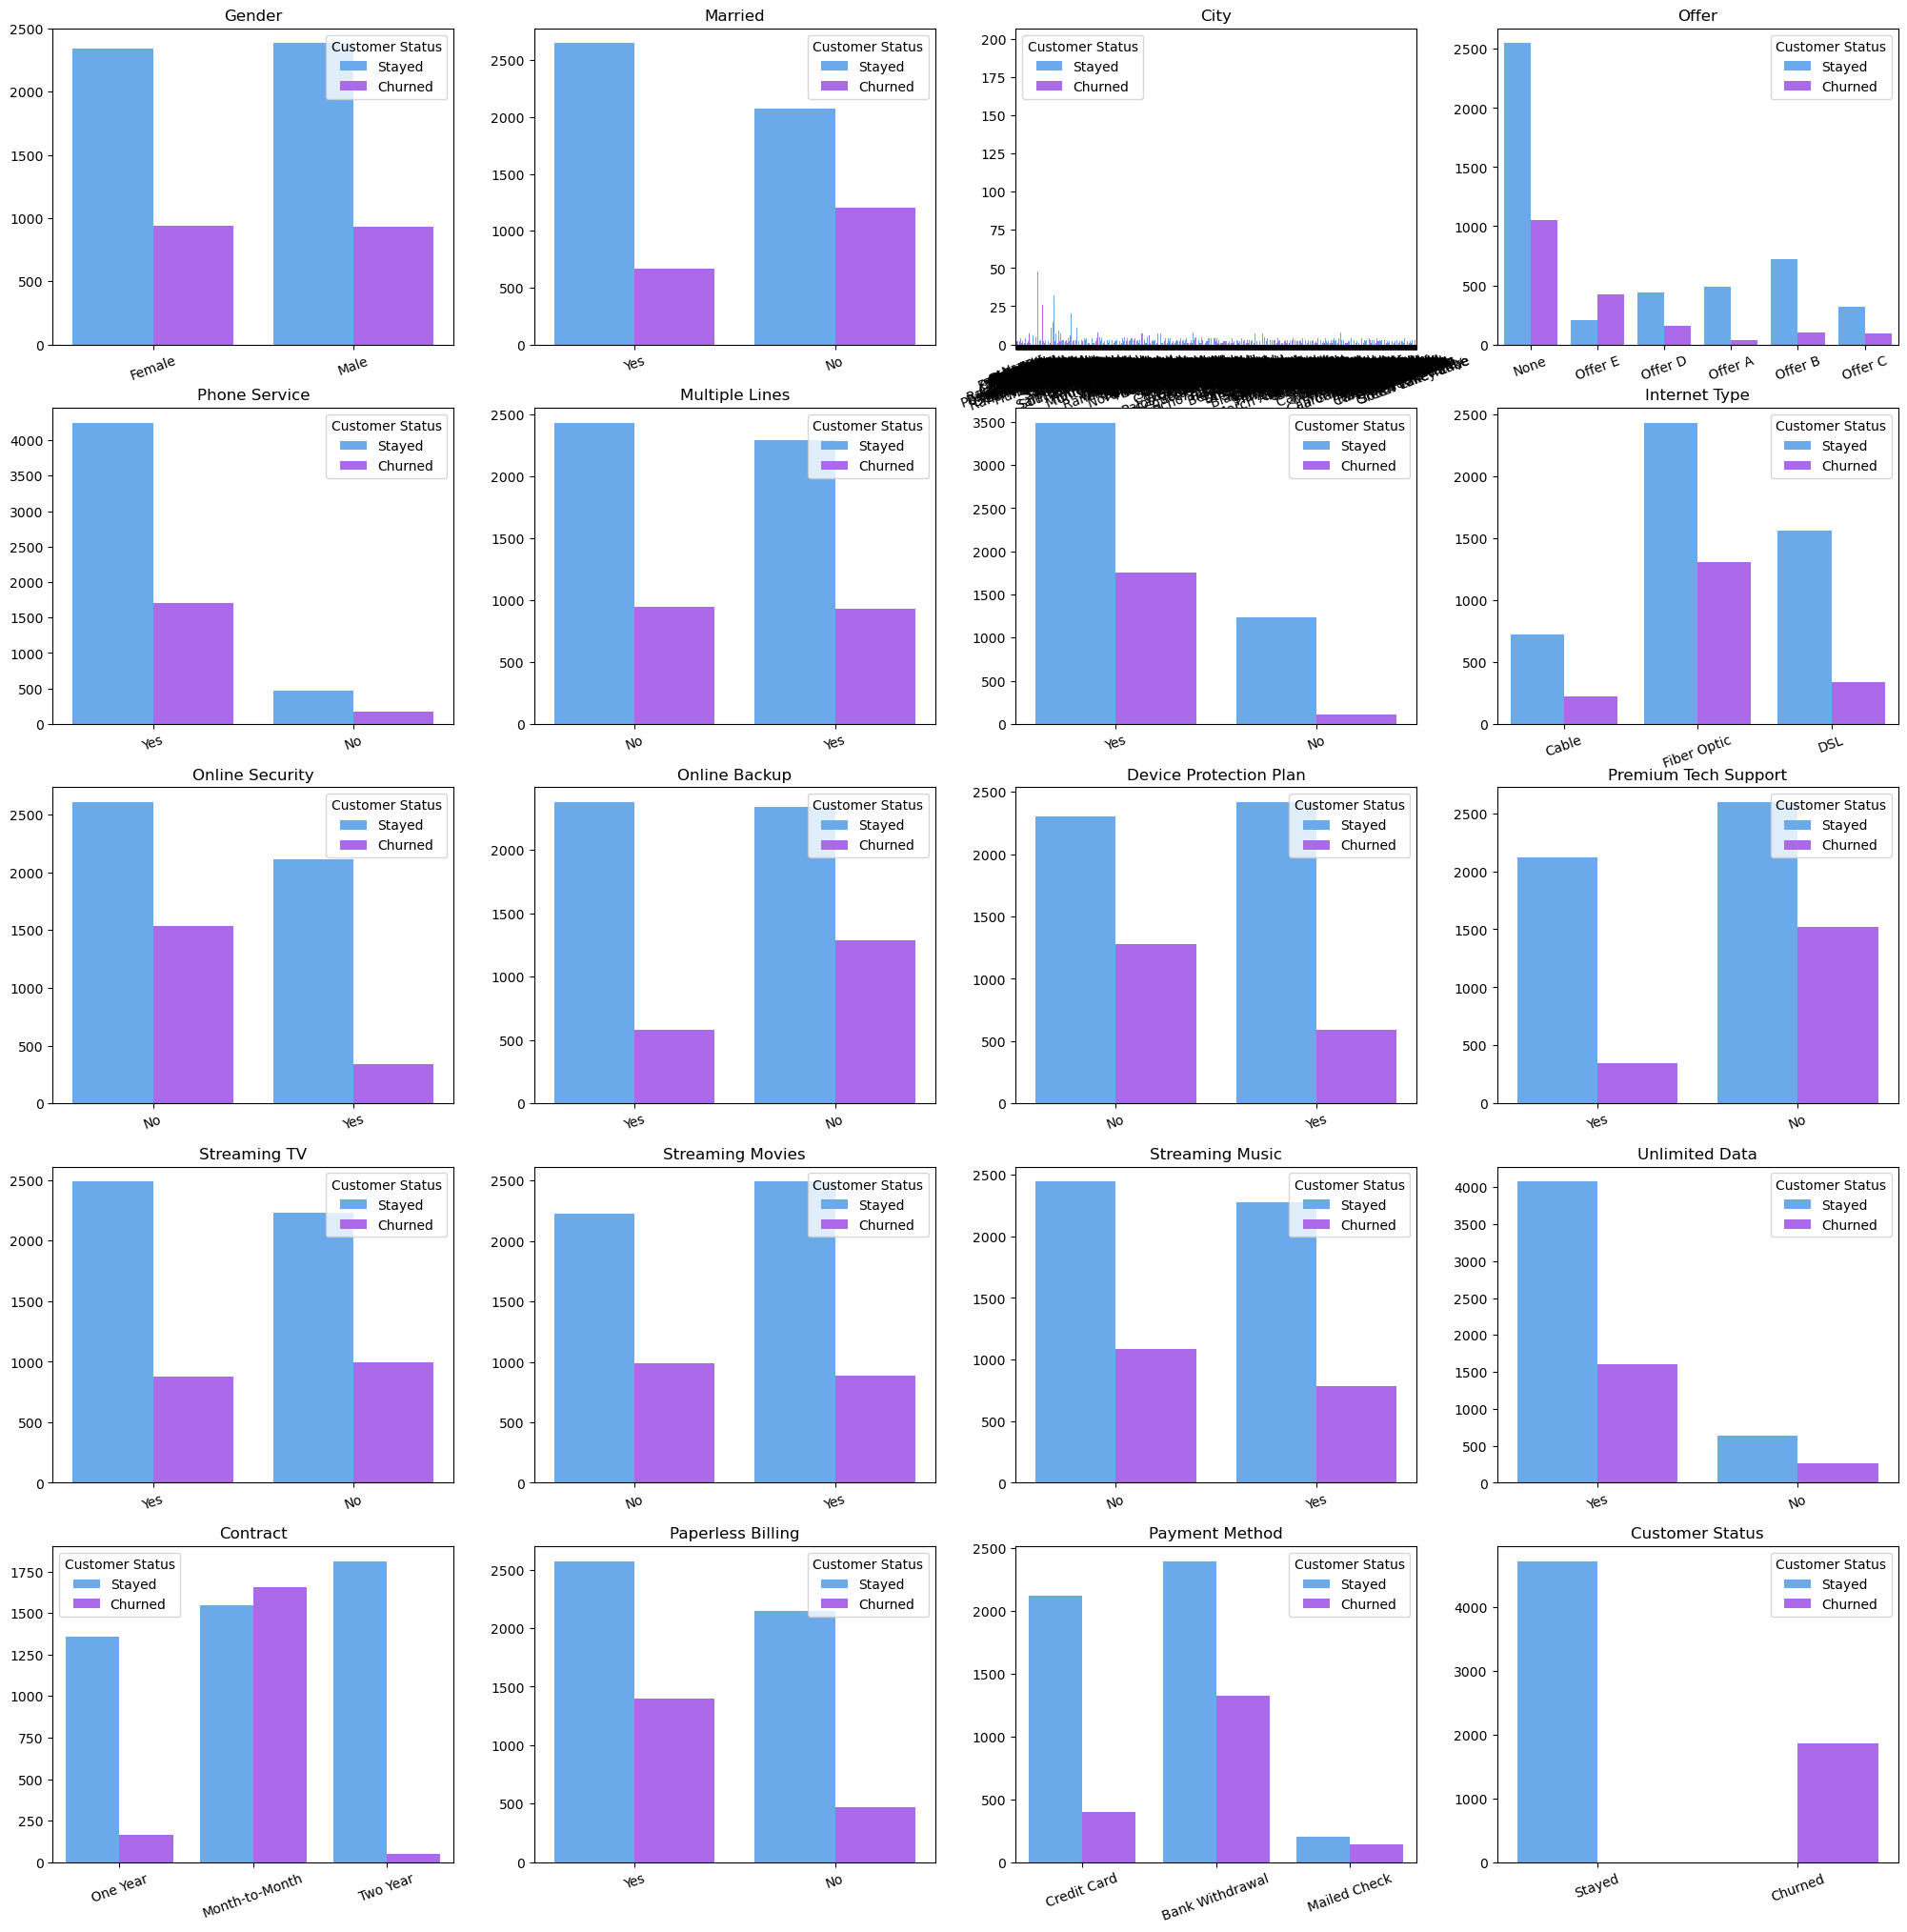

In [9]:

fig = plt.figure(figsize = (25, 25))

i = 1
for col in cat_columns.columns:
    plt.subplot(5, 4, i)
    ax = sns.countplot(data = cat_columns, x = cat_columns[col], hue = 'Customer Status', palette ='cool')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1
  

From the plots we see that:

* Unmarried people tend to churn more.
* most customers who churned did not have  subscriptions  like  online backup, online security, device protection plan or premium tech support features from the telecom company.
*  Customers whose contract was month to month were likely to churn more than the yearly or bi annual contract customers.
* Customers with phone services or unlimited access to data churned more.
* Those who used Bank Withdrawal as a mode of payment churned more.

### Numerical Column and our target variable.

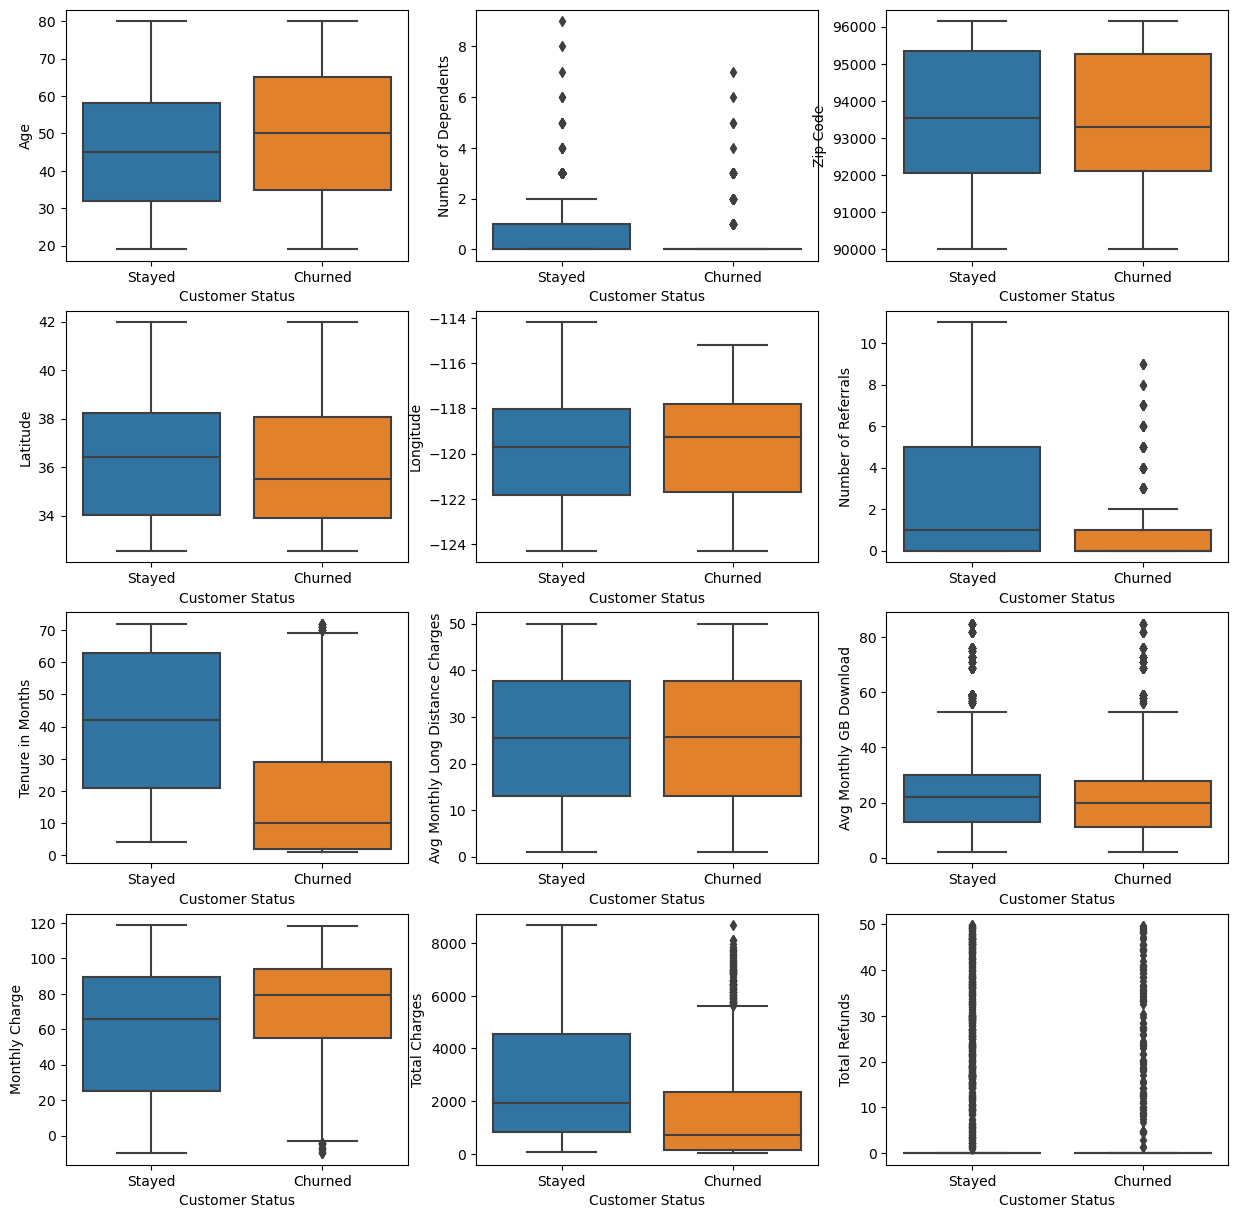

In [10]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(num_columns, ax.flatten()):
    sns.boxplot(x= 'Customer Status', y = i , data = df, ax = subplot)

In [11]:
#changing our predictor class to numerical using label encoder
#instatiating the LabelEncoder class
encoder = LabelEncoder()

df['Customer Status'] =  encoder.fit_transform(df['Customer Status'])
# 1 represents customers who stayed(did not churn)  while 0 represents customers who churned
df['Customer Status'].value_counts()


1    4720
0    1869
Name: Customer Status, dtype: int64

### i)    At what age are customers likely to churn more.

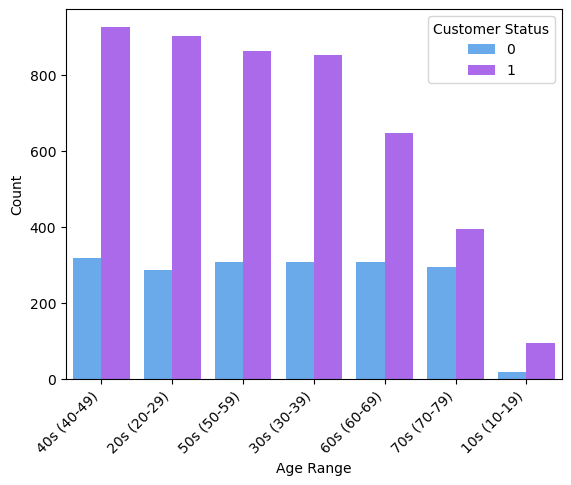

In [12]:
def bin_age(df):
    # Create a copy of the DataFrame
    df_copy = df.copy() 
    # Create a list of boundaries for each decade
    age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
    # Create a list of labels for each age range in ascending order
    age_labels = [f'{age}s ({age}-{age+9})' for age in sorted(age_bins[:-1])]
    # Bin "Age" into ranges
    df_copy['Age Range'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)
    return df_copy


df_binned = bin_age(df)

# Sort the age ranges based on count in ascending order
age_range_counts = df_binned['Age Range'].value_counts()
sorted_age_labels = age_range_counts.index.tolist()

# Plot age against customer status with sorted age labels
sns.countplot(data=df_binned, x='Age Range', hue='Customer Status', order=sorted_age_labels, palette = ('cool'))

# Adjust x-tick labels alignment
plt.xticks(rotation=45, ha='right')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


 Most of the Customers are in their 40s and 20s. Customers in their 40s, 50s and 30s tend to churn more.
 

### ii) Does the number of dependants and number of referrals  affect customers churn?

In [17]:
# Plot Number of dependants against customer status
df["Number of Dependents"].value_counts()

fig= px.histogram(df, color="Customer Status",
             x='Number of Dependents', barmode='group',opacity=1, histfunc="count",
             height=400)
fig.show()

In [18]:
# Plot Number of referrals against customer status
df["Number of Referrals"].value_counts()

fig= px.histogram(df, color="Customer Status",
             x='Number of Referrals', barmode='group',opacity=1, histfunc="count",
             height=400)
fig.show()

 Customers with zero dependants  and also those with No referrals tend to churn more.



### iii) Customers at which location in california churn more

In [19]:
#choosing a city with more than 20 customers
cities_with_more_than_20_customers = df['City'].value_counts() > 20

# Select cities with more than 20 customers
selected_cities = cities_with_more_than_20_customers[cities_with_more_than_20_customers].index

# Filter the DataFrame based on selected cities
filtered_df = df[df['City'].isin(selected_cities)]
#plot 

fig = px.histogram(filtered_df , color = 'Customer Status', x= 'City', barmode= 'group', histfunc = 'count', opacity = 1)
fig.show()


Los Angeles, San Diego and Sacramento have the highest number of customers. Subsequently,  the highest number of churned customers come from the same states.

### iv) What is the relationship between Total Charges and customer's status

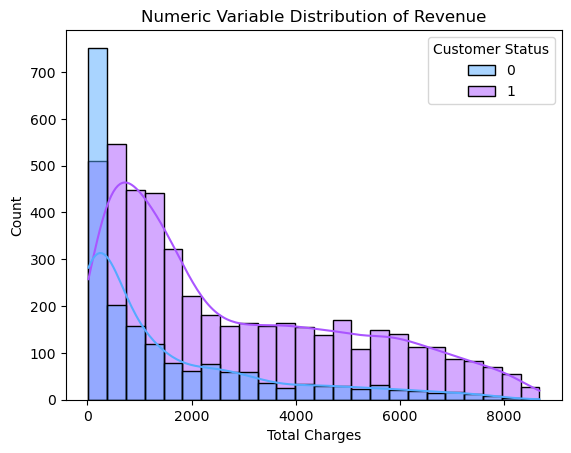

In [21]:
# Plot histogram with KDE (Kernel Density Estimate)'
sns.histplot(data=df, x='Total Charges', hue='Customer Status', kde=True, palette = 'cool')

# Set the title of the plot
plt.title('Numeric Variable Distribution of Revenue')

# Display the plot
plt.show()


As Charges  increase on using different products, the number of customers decrease.That is, Customers tend to churn more is charges are costly. 

# Multivariate Analysis

In [29]:
#checking correlation between the numerical columns and our predictor
df.corr()['Customer Status']

Age                                 -0.111174
Number of Dependents                 0.232525
Zip Code                             0.018888
Latitude                             0.044023
Longitude                           -0.025455
Number of Referrals                  0.312118
Tenure in Months                     0.433759
Avg Monthly Long Distance Charges   -0.002938
Avg Monthly GB Download              0.078692
Monthly Charge                      -0.168290
Total Charges                        0.250071
Total Refunds                        0.043525
Total Extra Data Charges             0.000259
Total Long Distance Charges          0.268430
Total Revenue                        0.278626
Customer Status                      1.000000
Name: Customer Status, dtype: float64

<AxesSubplot:>

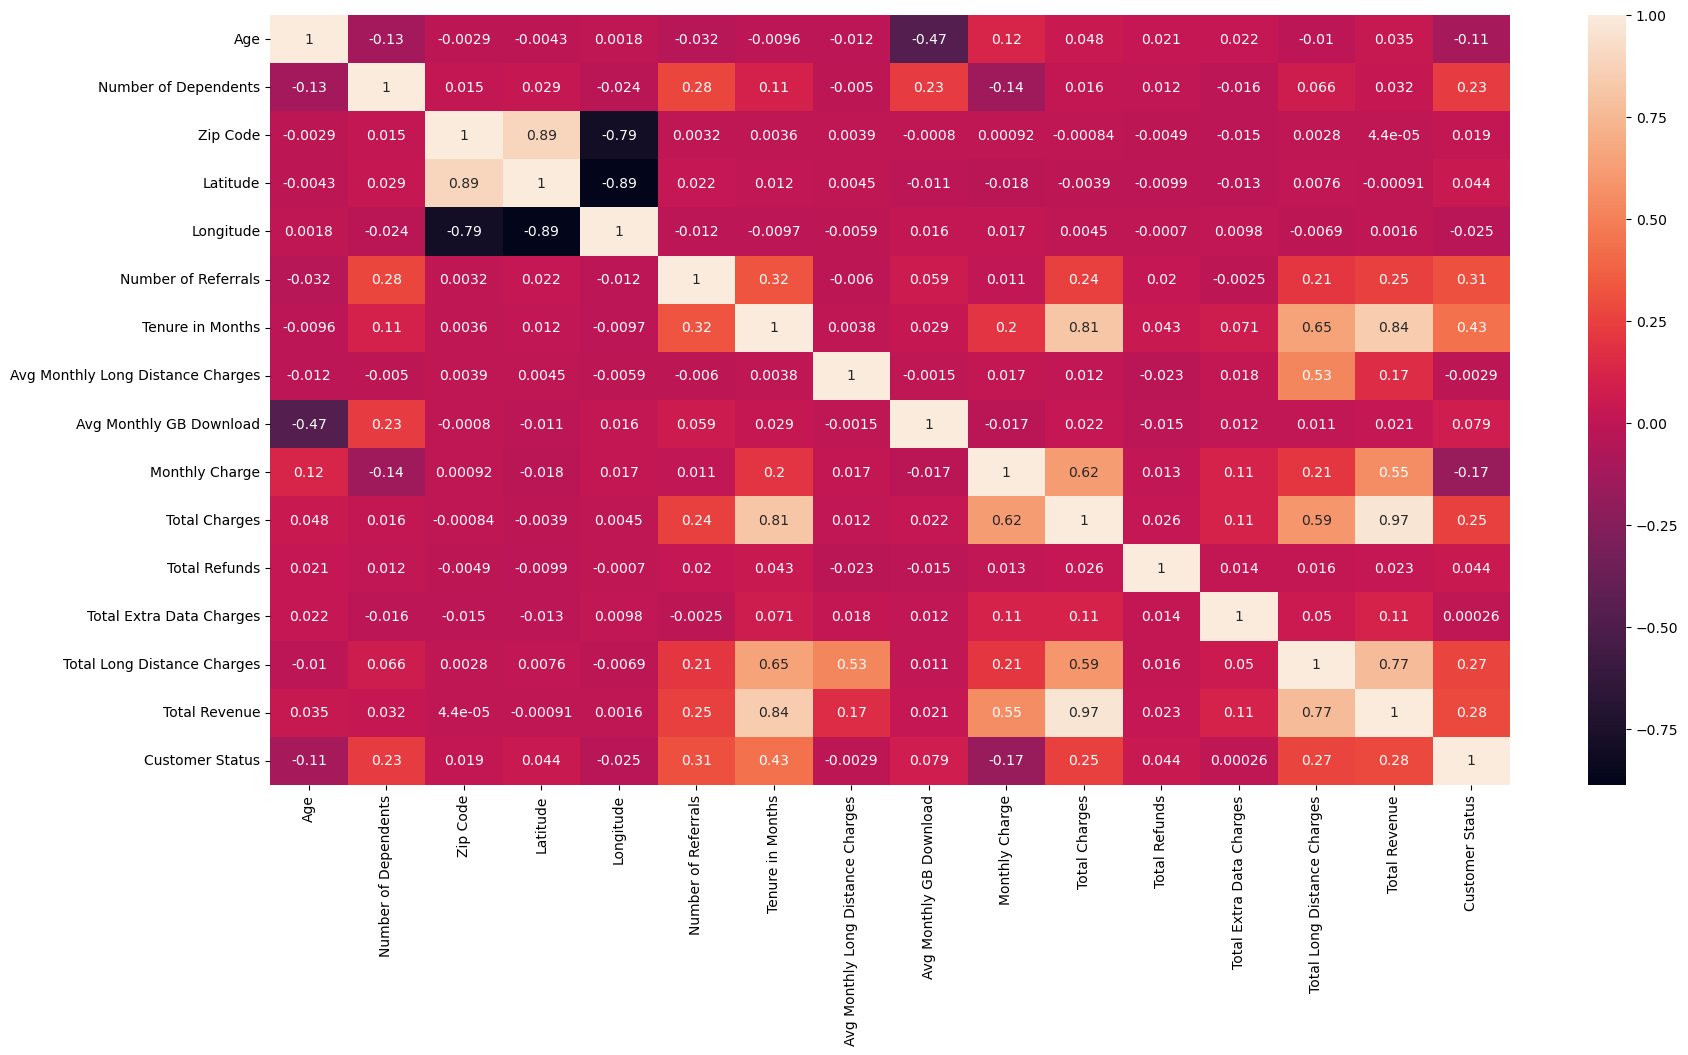

In [24]:

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

There is a strong negative  correlation between the following:
* latitude and longitude(0.89)
* Longitude and Zipcode(0.79)

And a strong positive correlation between:
* latitude and zipcode(0.89)
* Total revenue and tenure in months(0.84)
* Tenure in months and total charges(0.81)
* Total charges and monthly charges(0.62)
* Total charges and Total revenue (0.97)
* Total long distance charges and Tenure in months(0.65)
* Total long distance charges and total revenue(0.77)


This will bring high bias  in  our models during prediction  resulting in overfitted models.

 # Data Preprocessing

In [25]:
#subsetting to obtain columns that will be used in building prediction models
cleaned_df = df[['Gender', 'Age', 'Married', 'Number of Dependents',
        'Number of Referrals', 'Tenure in Months', 'Zip Code',
       'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method',
        'Total Refunds',
        'Total Revenue', 'Customer Status']]
cleaned_df.shape
    

(6589, 27)

Let now transform the categorical columns to numerical through  One Hot encoding before we start modelling. 
The prediction target for this analysis is whether a  customer will churn . Let's split our data in predictors and features.

In [26]:
#target column
y = cleaned_df['Customer Status']
#features columns
X = cleaned_df.drop('Customer Status', axis =1)
#splitting our predictors into categorical columns and  numerical columns
X_cat = X.select_dtypes(exclude= 'number')
X_num = X.select_dtypes(include = 'number')


#instantiate OneHotEncoder Class
ohe = OneHotEncoder(sparse = False)
#fit the data
ohe.fit(X_cat)
#transform the features and convert them into  a dataframe
X_cat_encoded =pd.DataFrame(ohe.transform(X_cat),

 #index so as  to concatenate with other columns
    index = X_cat.index,
    columns = ohe.get_feature_names(X_cat.columns)
)




#concatenate with the numerical columns
X_new = pd.concat([X_num, X_cat_encoded], axis =1)
X_new

                                  
                          
                        
                              




,Age,Number of Dependents,Number of Referrals,Tenure in Months,Zip Code,Avg Monthly GB Download,Total Refunds,Total Revenue,Gender_Female,Gender_Male,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,93225,16.0,0.00,974.81,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,46,0,0,9,91206,10.0,38.33,610.28,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,50,0,0,4,92627,30.0,0.00,415.45,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,78,0,1,13,94553,4.0,0.00,1599.51,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,3,3,93010,11.0,0.00,289.54,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,0,4,92028,9.0,0.00,93.54,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7038,20,0,0,13,91941,59.0,0.00,1349.74,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,40,0,1,22,95367,17.0,0.00,2230.10,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7041,21,0,5,67,92075,58.0,0.00,4769.69,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Modelling

Our data is now ready for modelling. We will begin by fitting a logistic regression model as our vanilla model and evaluate its performance metrics. Subsequently, we will fit three additional classification models and assess their respective performance metrics. 

From the four models, we will select the two best-performing models based on accuracy score and recall score. We will then tune the remaining two models applying  ensemble methods as well as analyzing feature importance. 

Following the tuning process, we will select the best-performing model. This selected model will be utilized to predict whether a given customer will churn or not. 

The models we will use for this analysis are as follows:

1. Logistic Regression
2. K Nearest Neighbors (KNN)
3. Decision Trees
4. Random Forest


### 1. Splitting data into Train and Test

In [27]:
#perform 80_20 train_test  split with a  random state of 42 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 42, test_size =0.2)

### 2. Build and evaluate a Baseline model - LogisticRegression
 This model will act as a perfomance benchmark for all the other models and also assess the usability of our data.

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       383
           1       0.89      0.91      0.90       935

    accuracy                           0.85      1318
   macro avg       0.83      0.81      0.82      1318
weighted avg       0.85      0.85      0.85      1318



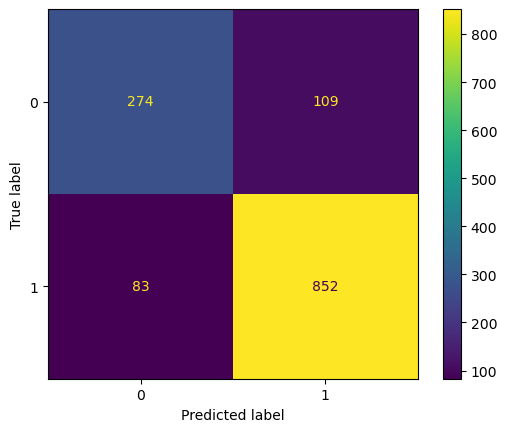

In [36]:
# Instantiate a Logistic Regression model with random state =42
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Fit the training data to the pipeline
logreg_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_pipe.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:\n", report)


# Plot the confusion matrix
plot_confusion_matrix(logreg_pipe, X_test, y_test);



AUC: 0.9189288057971824


<Figure size 1000x800 with 0 Axes>

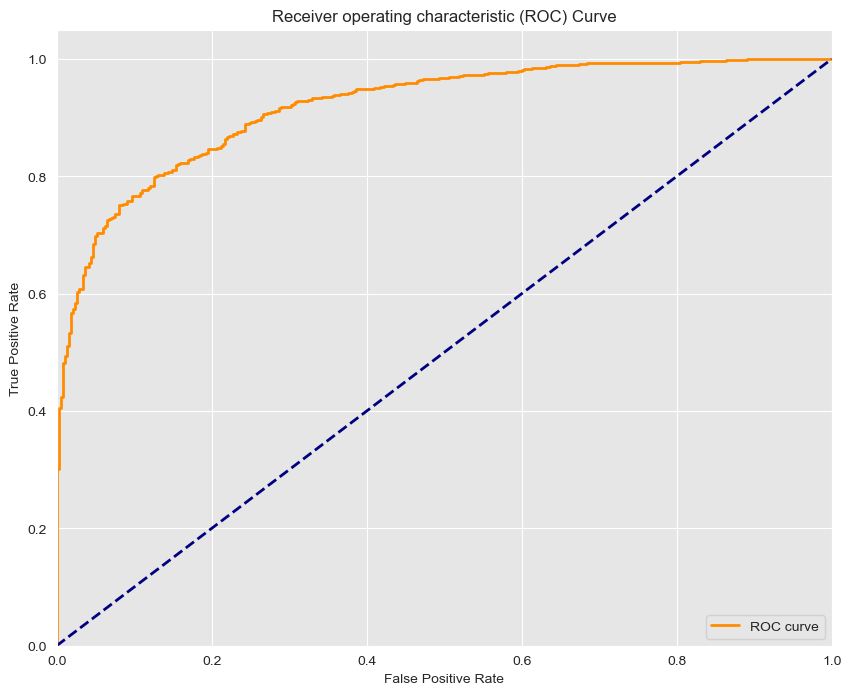

In [37]:
# Probability scores for test set
y_score = logreg_pipe.decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8))
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();


### Model Evaluation

Our Logistic Regression model achieved an accuracy score of 85 percent. This means that in 85 percent of the cases, the model's predictions align with the actual churn status of the customers.

Furthermore, the AUC score of 0.91 demonstrates the model's strong ability to distinguish between churned and non-churned customers. A higher AUC score suggests that the model has a high probability of ranking a randomly chosen churned customer higher than a randomly chosen non-churned customer.

However, the recall score for class 0 (churned) is 0.72, indicating room for improvement in correctly identifying churned customers. Therefore, exploring other models may provide additional insights and potentially enhance the model's performance in predicting churn.


### Fitting other models

### 3. KNearest Neighbors

KNearest Neighbours Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       383
           1       0.86      0.86      0.86       935

    accuracy                           0.80      1318
   macro avg       0.76      0.76      0.76      1318
weighted avg       0.80      0.80      0.80      1318



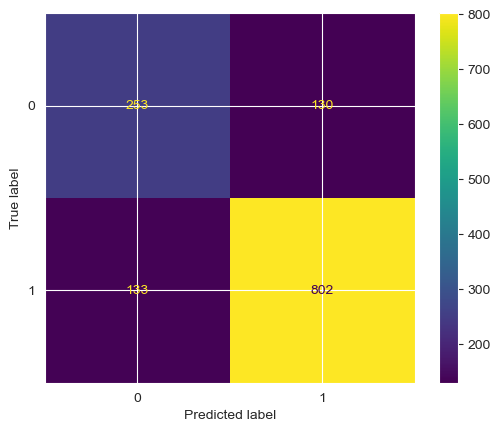

In [38]:
knn_pipe = Pipeline([('ss', StandardScaler()),
                 ('knn', KNeighborsClassifier())
                 ])
#fit the training data to pipeline
knn_pipe.fit(X_train,y_train)
#print the accuracy score on test set
y_pred_knn = knn_pipe.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred_knn)
print("KNearest Neighbours Classification Report:\n", report)


# Plot the confusion matrix
plot_confusion_matrix(knn_pipe, X_test, y_test);



Our KNN model achieved an accuracy score of 80%. This indicates that the model correctly predicted customer churn in 80% of the cases, considering both churned and non-churned customers.

In terms of recall, the  model achieved a recall score of 66% for churned customers (class 0) and 86% for non-churned customers (class 1). This means that the model correctly identified 66% of the actual churned customers and 86% of the actual non-churned customers  While the accuracy score suggests that the model is reasonably accurate overall, the lower recall score for churned customers (class 0) indicates that there may be room for improvement in correctly identifying churned customers, it also perfomed worse than our baseline model.

### 4. Decision Trees

Decision Trees Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69       383
           1       0.87      0.88      0.88       935

    accuracy                           0.83      1318
   macro avg       0.79      0.78      0.79      1318
weighted avg       0.82      0.83      0.82      1318



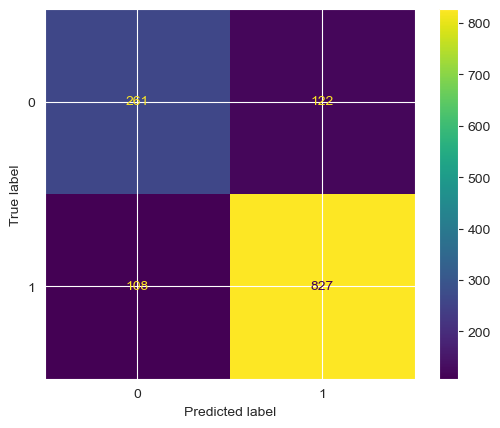

In [40]:
ds_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ds', DecisionTreeClassifier(random_state=42))
])

# Fit the training data to the pipeline
ds_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_ds = ds_pipe.predict(X_test)



# Print the classification report
report = classification_report(y_test, y_pred_ds)
print("Decision Trees Classification Report:\n", report)

# Plot the confusion matrix
plot_confusion_matrix(ds_pipe, X_test, y_test)

The Decision Tree classifier achieved an accuracy score of 83%, outperforming the K Nearest Neighbors (KNN) classifier in predicting customer churn. However, it falls short compared to our baseline model, logistic regression. The model attained a recall score of 68% for churned customers (class 0) and 88% for non-churned customers (class 1), indicating its effectiveness in identifying both churned and non-churned customers. Enhancements may be needed to improve the recall score for churned customers and enhance the model's ability to identify potential churn accurately.

### 5. Random Forest

 Random Forest  Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.74       383
           1       0.87      0.95      0.91       935

    accuracy                           0.87      1318
   macro avg       0.86      0.81      0.83      1318
weighted avg       0.87      0.87      0.86      1318



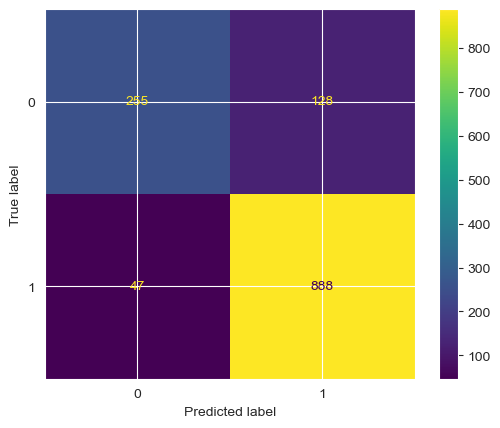

In [41]:

rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit the training data to the pipeline
rf_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipe.predict(X_test)



# Print the classification report
report = classification_report(y_test, y_pred_rf)
print(" Random Forest  Classification Report:\n", report)

# Plot the confusion matrix
plot_confusion_matrix(rf_pipe, X_test, y_test)



Out of the four models evaluated, the Random Forest classifier demonstrated the highest accuracy score of 87%. This indicates that the model can predict whether a customer has churned or not correctly 87% of the time. Additionally, the model achieved a recall score of 66% for churned customers (class 0) and 96% for not churned customers (class 1). This means that the model correctly identified 66% of the actual churned customers and 96% of the actual not churned customers. The combination of high accuracy and relatively balanced recall scores makes the Random Forest classifier a better performer for predicting customer churn.

### Model tuning and Future Selection

We will choose random forest and LogisticRegression classifiers since the two are the best performers, tune the two and choose the best performer. Model tuning wil involve:
* Future Selection
* Use  GridSearchCV to find best hyperparameters and cross-validation  to evaluate model perfomance on unseen data.
* Perform regularization to prevent overfitting.

### Future Selection

For feature selection, we will utilize XGBoost to rank the columns according to their importance in predicting the target variable, which is the customer status of churn or not. XGBoost provides a feature importance ranking that allows us to assess the significance of each feature in our dataset. We will then select the performing features according to their ranks.


Contract_Month-to-Month           0.418256
Number of Dependents              0.054004
Internet Service_No               0.042755
Tenure in Months                  0.042211
Number of Referrals               0.037619
Contract_One Year                 0.032781
Contract_Two Year                 0.029262
Internet Type_DSL                 0.023544
Payment Method_Credit Card        0.021193
Internet Type_Fiber Optic         0.021087
Married_No                        0.018913
Streaming Movies_No               0.015675
Age                               0.014979
Online Security_No                0.014243
Streaming Music_No                0.013417
Paperless Billing_No              0.012662
Streaming TV_No                   0.012196
Total Refunds                     0.011832
Offer_Offer A                     0.011559
Offer_Offer C                     0.010636
Zip Code                          0.010511
Phone Service_No                  0.010458
Multiple Lines_No                 0.009655
Offer_Offer

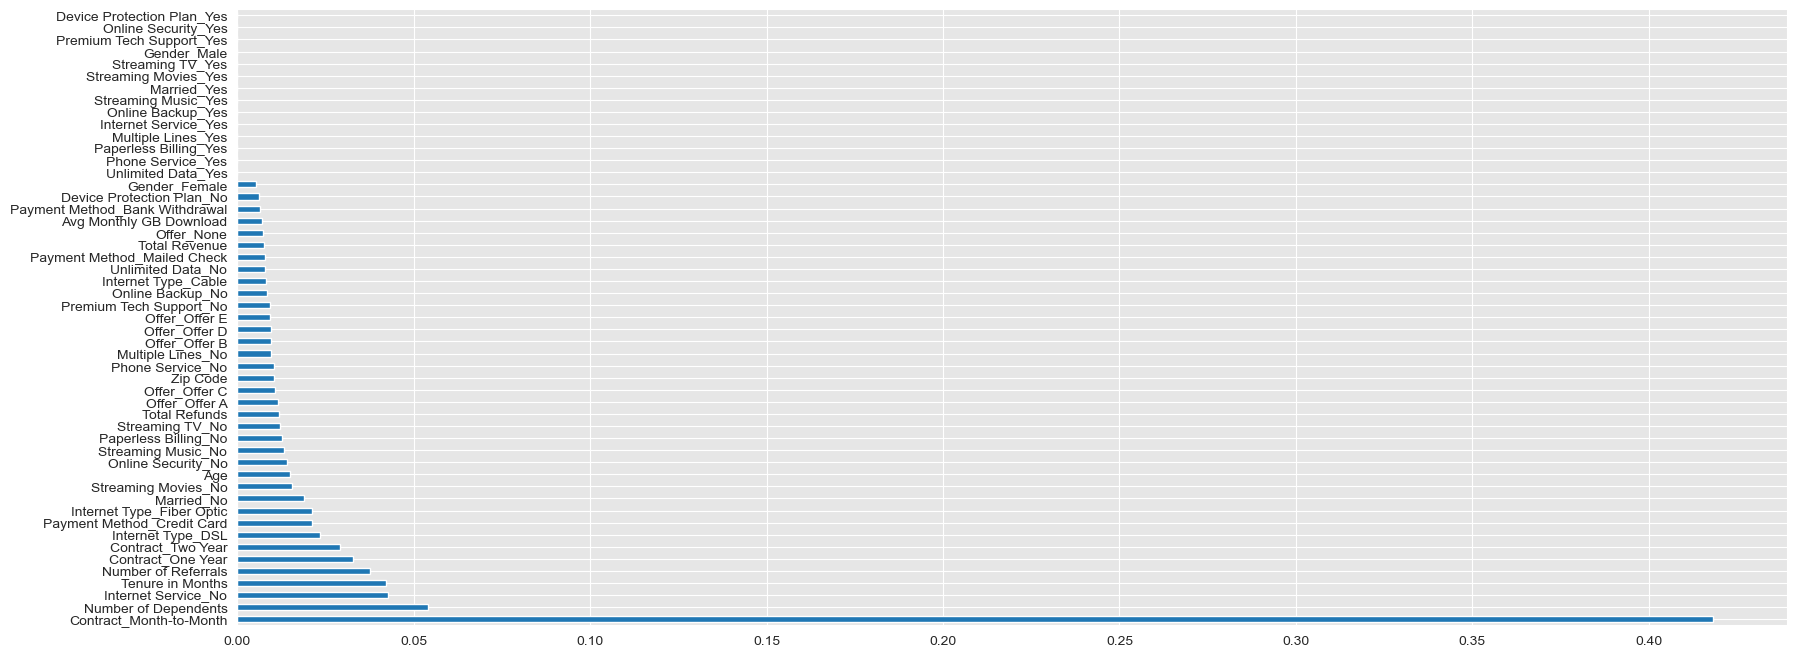

In [42]:
#instantiate XGBoost classifier
model = xgboost.XGBClassifier()

# Fit the model
model.fit(X_new, y)

# Calculate the feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_new.columns).sort_values(ascending=False)

# Print the feature importances
print(feat_importances)

# Plot all features
plt.figure(figsize=(20, 8))
feat_importances.plot(kind='barh')
plt.show()


Next we choose columns with their feature importances greater than zero.These are the columns we will tune.

In [47]:
# Filter the columns with non-zero feature importance
selected_columns = feat_importances[feat_importances != 0].index

# Create a new DataFrame with the selected columns
new_df = X_new[selected_columns]



# Perform train-test split on the selected features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_df, y, test_size=0.2, random_state=42)

### Tuning Logistic Regression

In [51]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(penalty='l1', solver='liblinear'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'logistic__C': [0.1, 1.0, 10.0],
    'logistic__fit_intercept': [True, False],
}

# Perform cross-validation grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_new, y_train_new)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the trained pipeline
y_pred = grid_search.predict(X_test_new)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_new, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'logistic__C': 0.1, 'logistic__fit_intercept': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       383
           1       0.89      0.91      0.90       935

    accuracy                           0.86      1318
   macro avg       0.83      0.82      0.83      1318
weighted avg       0.86      0.86      0.86      1318



The accuracy score has increased by one percent from 85 percent to 86 percent.Even the recall score has increased to 73 percent in predicting customers who have churned and 91 percent for non churned customers.


### Tuning RandomForest

In [52]:
# Define the parameter grid for GridSearchCV
param_grid_random_forest = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [7, 8],
    'rf__max_features': [7, 8],
    'rf__min_samples_leaf': [1, 2],
    'rf__min_samples_split': [2, 3],
    'rf__criterion': ['gini', 'entropy'],
    'rf__bootstrap': [True, False],
    'rf__random_state': [42]
}
# Create the GridSearchCV object
gridsearch_random_forest = GridSearchCV(estimator=rf_pipe, param_grid=param_grid_random_forest, cv=5, verbose=2, n_jobs=-1)
# Fit the GridSearchCV on the training data
gridsearch_random_forest.fit(X_train_new, y_train_new)
# Get the best parameters
best_params_random_forest = gridsearch_random_forest.best_params_
print("Best Parameters:", best_params_random_forest)
# Make predictions on the test data using the trained pipeline
y_pred_gridsearchrf = gridsearch_random_forest.predict(X_test_new)
# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_new, y_pred_gridsearchrf))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'rf__bootstrap': True, 'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__max_features': 8, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 300, 'rf__random_state': 42}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.74       383
           1       0.87      0.96      0.91       935

    accuracy                           0.87      1318
   macro avg       0.87      0.81      0.83      1318
weighted avg       0.87      0.87      0.86      1318



This tuned random forest perfomed the same as our untuned one , we will finally fit ensemble models to see if our prediction quality improve.

### Ensemble Methods

In [61]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state = 42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state = 42)
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train_new, y_train_new)
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train_new, y_train_new)
# AdaBoost model predictions
adaboost_train_preds =adaboost_clf.predict(X_train_new) 
adaboost_test_preds =adaboost_clf.predict(X_test_new)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train_new)
gbt_clf_test_preds = gbt_clf.predict(X_test_new)
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true,preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train_new, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train_new, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test_new, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test_new, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8772528931891481
F1-Score: 0.9160285528877352

Model: Gradient Boosted Trees
Accuracy: 0.8975526465566306
F1-Score: 0.9305912596401029

Testing Metrics
Model: AdaBoost
Accuracy: 0.8672230652503794
F1-Score: 0.9087115284298384

Model: Gradient Boosted Trees
Accuracy: 0.877845220030349
F1-Score: 0.9167958656330749


### Final Model Evaluation

 Gradient Boosted Trees  Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       383
           1       0.89      0.95      0.92       935

    accuracy                           0.88      1318
   macro avg       0.87      0.83      0.84      1318
weighted avg       0.88      0.88      0.87      1318



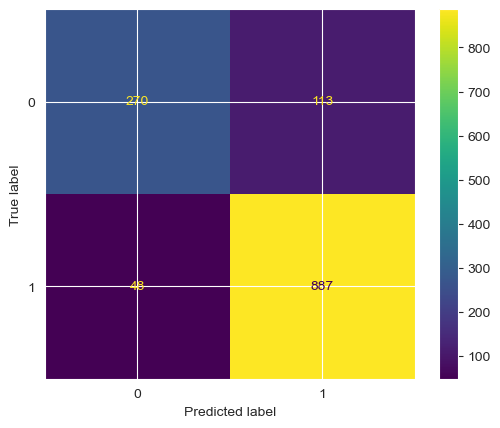

In [64]:
# Print the classification report
report = classification_report(y_test_new, gbt_clf_test_preds)
print(" Gradient Boosted Trees  Classification Report:\n", report)

# Plot the confusion matrix
plot_confusion_matrix(gbt_clf , X_test_new, y_test_new)


After thorough evaluation, the Gradient Boosted Tree emerges as the optimal choice for our final model. It showcases exceptional accuracy, achieving training and test scores of 0.89 and 0.87, respectively. Maven Communication will utilize this powerful model to accurately predict customer churn, allowing proactive measures to be implemented and mitigating potential revenue loss. Notably, the model demonstrates a recall score of 70 for class 0 (customer churning) and an impressive 95 for class 1, enabling Maven Communication to effectively identify customers at risk of churn and tailor retention strategies accordingly.

### Results and Conclusion

* Gradient boosted Trees is the best classifier to be used to predict if a given customer will churn or not.
* Los Angeles, San Diego and Sacramento location have the highest numbers of customers and the highest churn rate.
* Increase in charges either monthly or total charges make customer churn.
* Customers with zero dependants and the unmarried ones tend to churn more.
*Majority of the customers don't recieve offers and tend to churn more.
* Most of the customers did not have premium subscription like online backup, online security, Device protection plan or premium tech support and they churned more.
*  Most customers did not recieve referrals and those with no referral churned more.

### Recommendations

1. Use Gradient Boosted Trees: Employ this classifier for accurate customer churn prediction.

2. Monitor and Address Pricing: Be cautious of increasing charges as it may lead to customer churn.

3. Offer Incentives: Provide attractive offers to customers as those without offers are prone to churn.
4. Enhance Premium Subscriptions: Promote premium features like online backup, online security, device protection plan, and premium tech support to reduce churn.
